# <center> Chocolate Ratings Analysis </center>

<img src="https://github.com/AvaWhitney/chocolate-ratings-analysis/blob/main/media/chocolate_image.jpeg?raw=true">

## Project Overview
This project analyzes the ratings of dark chocolate bars using data scraped from FlavorsOfCacao.com.

We will explore factors like cacao percentage, bean origin, and ingredients to understand what influences higher ratings. 

## Goals
* Clean and preprocess the dataset.
* Explore consumer preferences and rating distribution.
* Perform geospacial analysis on cocoa bean origins.
* Generate insights through visualizations.

## Key Definitions & Data Descriptions  

To better understand the dataset and analysis, below are definitions for key terms used throughout this notebook.  

#### Chocolate Rating Scale  
The chocolates in this dataset are rated on a **scale from 1.0 to 5.0**, with:  
- **1.0 - 1.9** = Unpleasant  
- **2.0 - 2.9** = Disappointing  
- **3.0 - 3.5** = Recommended   
- **3.6 - 3.9** = Highly Recommended   
- **4.0 - 5.0** = Outstanding  


#### Ingredient Abbreviations  
Each chocolate bar lists its primary ingredients using the following abbreviations:  
- **B** = Cocoa Beans  
- **S** = Sugar  
- **C** = Cocoa Butter  
- **V** = Vanilla  
- **L** = Lecithin  
- **Sa** = Salt
- **S\*** = Sweetener other than white cane or beet sugar


###  Word Categories in Chocolate Reviews  
Words used to describe chocolates are grouped into **categories** for analysis. Below are some common groups:  


| **Category**      | **Definition** | **Examples** |
|-------------------|--------------|-------------|
| **Aftermelt**     | Describes the lingering taste and texture of chocolate after it has melted. | Fading, long-lasting, short-lived |
| **Alcohol**       | Notes of alcoholic beverages present in the flavor. | Bourbon, wine, whiskey, rum |
| **Appearance**    | Characteristics related to the **visual aspect** of the chocolate. | Glossy, dull, color, shine |
| **Aroma**         | The scent or smell of the chocolate before tasting. | Aroma, fragrant, perfume |
| **Baked**         | Flavors reminiscent of **baked goods or pastry-like elements**. | Brownie, cookie, graham, toast |
| **Chemical**      | Notes that resemble **artificial, synthetic, or off-putting** flavors. | Chlorine, plastic, metallic, artificial |
| **Cocoa**         | Chocolate & cocoa-based descriptors. | Honey, caramel, malty, maple |
| **Complexity**    | Indicates a **varied and layered flavor profile**. | Balanced, refined, dynamic, flat |
| **Dairy**         | Notes associated with **milk-derived products**. | Creamy, cheese, yogurt, milky |
| **Earthy**        | Flavors reminiscent of **soil, wood, or natural elements**. | Moss, tobacco, woody, forest |
| **Floral**        | Describes delicate **flower-like aromas or flavors**. | Jasmine, lavender, rose, violet |
| **Fruit**         | Any **fruit-forward flavor notes**. | Raspberry, citrus, fig, cherry |
| **Intensity**     | Describes the **strength or impact** of flavor. | Bold, mild, overpowering, muted |
| **Nuts**          | Notes resembling **various nuts or nut butter flavors**. | Almond, hazelnut, peanut, cashew |
| **Other**         | Miscellaneous descriptors that don't fit in other categories. | Tropical, clean, tea, leather |
| **Roasty**        | Flavors that suggest **roasted or burnt** elements. | Coffee, burnt, smoky, tobacco |
| **Sour**          | Notes that have **acidic or tangy qualities**. | Vinegar, tart, tangy |
| **Spice**         | Describes **spicy or warm flavor notes**. | Cinnamon, clove, pepper, nutmeg |
| **Sweet**         | Refers to the **perceived sweetness** of the chocolate. | Honey, caramel, syrup, maple |
| **Texture**       | Relates to the **physical feel** of chocolate in the mouth. | Gritty, silky, chewy, waxy |
| **Umami**         | A **savory or meaty** quality in chocolate. | Ham, salty, savory |
| **Vegetal**       | Describes flavors associated with **vegetables**. | Carrots, cucumber |



## Import Libraries and Load Dataset

In [8]:
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
import matplotlib.patches as mpatches
import plotly.graph_objects as go
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
from collections import Counter
from wordcloud import WordCloud
import statsmodels.api as sm
import plotly.express as px
import geopandas as gpd
import seaborn as sns
import pandas as pd
import numpy as np
import folium
import re

sns.set_style("whitegrid")

In [9]:
df = pd.read_csv("./Datasets/chocolate_ratings.csv")
df.head()

,REF,Company(Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
0,2454,5150,U.S.A.,2019,Madagascar,"Bejofo Estate, batch 1",76%,"3- B,S,C","cocoa, blackberry, full body",3.75
1,2458,5150,U.S.A.,2019,Dominican Republic,"Zorzal, batch 1",76%,"3- B,S,C","cocoa, vegetal, savory",3.50
2,2454,5150,U.S.A.,2019,Tanzania,"Kokoa Kamili, batch 1",76%,"3- B,S,C","rich cocoa, fatty, bready",3.25
3,2542,5150,U.S.A.,2021,India,"Anamalai, batch 1",68%,"3- B,S,C","milk brownie, macadamia,chewy",3.50
4,2546,5150,U.S.A.,2021,Uganda,"Semuliki Forest, batch 1",80%,"3- B,S,C","mildly bitter, basic cocoa, fatty",3.25


## Data Inspection and Cleaning

To prepare data for analysis, we will check for:
* Missing values
* Incorrect data types
* Inconsistencies in formatting and names

In [11]:
# Looking for missing values
df.isnull().sum()

REF                                  0
Company(Manufacturer)                0
Company Location                     0
Review Date                          0
Country of Bean Origin               0
Specific Bean Origin or Bar Name     0
Cocoa Percent                        0
Ingredients                         87
Most Memorable Characteristics       0
Rating                               0
dtype: int64

In [12]:
df[df["Ingredients"].isnull()]

,REF,Company(Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Ingredients,Most Memorable Characteristics,Rating
98,1964,Amazing Cacao,Russia,2017,Peru,Platan Bajo,70%,NaN,"few grits, blackcherry, licorice",3.50
99,1964,Amazing Cacao,Russia,2017,Peru,Maranon,70%,NaN,"raisins, pungent",3.00
185,486,Artisan du Chocolat,U.K.,2010,Venezuela,Venezuela,100%,NaN,"very nutty, very bitter",1.75
330,81,Bonnat,France,2006,Blend,One Hundred,100%,NaN,"acidic, bitter, dry",1.50
358,341,Bouga Cacao (Tulicorp),Ecuador,2009,Ecuador,"El Oro, Hacienda de Oro",100%,NaN,"cardboard, very bitter, floral",1.50
...,...,...,...,...,...,...,...,...,...,...
2679,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",75%,NaN,"cocoa,earthy,very astringent",3.00
2681,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",100%,NaN,"bland, mild fruit, strong bitter",2.00
2682,153,Vintage Plantations (Tulicorp),U.S.A.,2007,Ecuador,"Los Rios, Rancho Grande 2004/2007",90%,NaN,"some fruit, strong bitter",2.00
2706,733,Whittakers,New Zealand,2011,Ghana,Ghana,72%,NaN,"sticky, dry, vanilla dominates",2.50


In [13]:
# Since the missing ingredients seem to be random and are a small percentage of the dataset, we will fill them with "N/A"
df.fillna({"Ingredients": "N/A"}, inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2789 entries, 0 to 2788
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   REF                               2789 non-null   int64  
 1   Company(Manufacturer)             2789 non-null   object 
 2   Company Location                  2789 non-null   object 
 3   Review Date                       2789 non-null   int64  
 4   Country of Bean Origin            2789 non-null   object 
 5   Specific Bean Origin or Bar Name  2789 non-null   object 
 6   Cocoa Percent                     2789 non-null   object 
 7   Ingredients                       2789 non-null   object 
 8   Most Memorable Characteristics    2789 non-null   object 
 9   Rating                            2789 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 218.0+ KB


In [15]:
# Converting "Cocoa Percent" column to a numeric format for analysis.
df["Cocoa Percent"] = df["Cocoa Percent"].str.replace("%","").astype(float)

In [16]:
# Cleaning text columns to remove leading and trailing spaces
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)

In [17]:
# Correcting country names
country_name_corrections = {
    "U.S.A.": "United States of America",
    "DR Congo": "Democratic Republic of the Congo",
    "Tobago": "Trinidad and Tobago",
    "Trinidad": "Trinidad and Tobago",
    "Tanzania": "United Republic of Tanzania",
    "France (Reunion)": "France",
    "Principe": "Sao Tome and Principe",
    "Sao Tome": "Sao Tome and Principe",
    "Sao Tome & Principe": "Sao Tome and Principe",
    "Malaysisa": "Malaysia",
    "St.Vincent-Grenadines": "Saint Vincent and the Grenadines",
    "Sulawasi": "Indonesia",
    "Sumatra": "Indonesia",
}

df["Country of Bean Origin"] = df["Country of Bean Origin"].replace(country_name_corrections)

In [18]:
# Saving the cleaned dataset
df.to_csv("chocolate_ratings_clean.csv", index=False)

## Exploratory Data Analysis

Now that our dataset is clean, we analyze:
* The distribution of ratings.
* The relationship between cocoa percentage and rating.
* Which cocoa bean origins have the highest-rated chocolate.


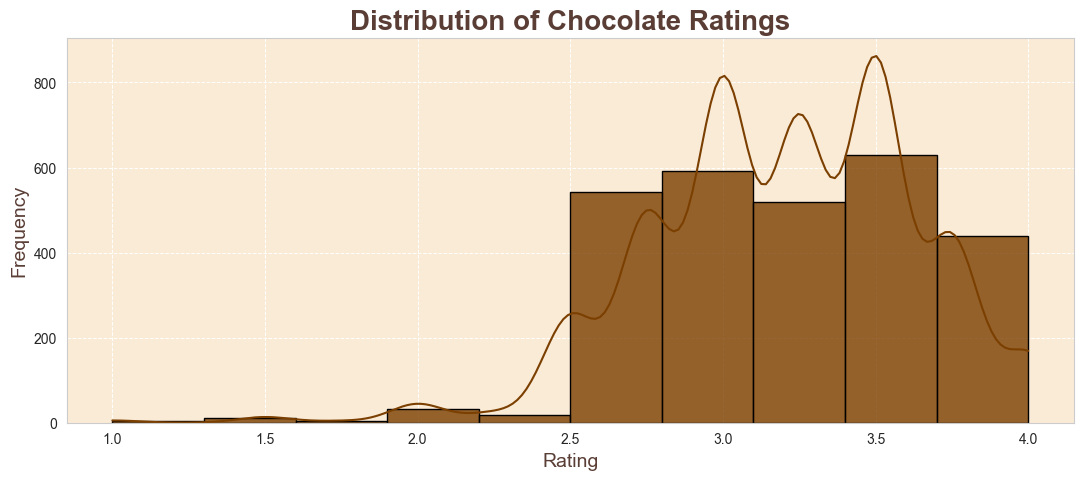

In [20]:
# Chocolate Ratings Distribution
plt.figure(figsize=(13, 5))
sns.histplot(df["Rating"], bins=10, kde=True, color="#7B3F00", edgecolor="black", alpha=0.8)
plt.title("Distribution of Chocolate Ratings", fontsize=20, fontweight="bold", color="#5A3E36")
plt.xlabel("Rating", fontsize=14, color="#5A3E36")
plt.ylabel("Frequency", fontsize=14, color="#5A3E36")
plt.grid(color="white", linestyle="--", linewidth=0.7)
plt.gca().set_facecolor("#FAEBD7") 
plt.show()

#### Insights and Notes: 
* Most chocolates have ratings between 2.5 and 3.5 with peaks around 3.0 and 3.5
* Very few chocolates are rated below 2.0 or above 4.0.

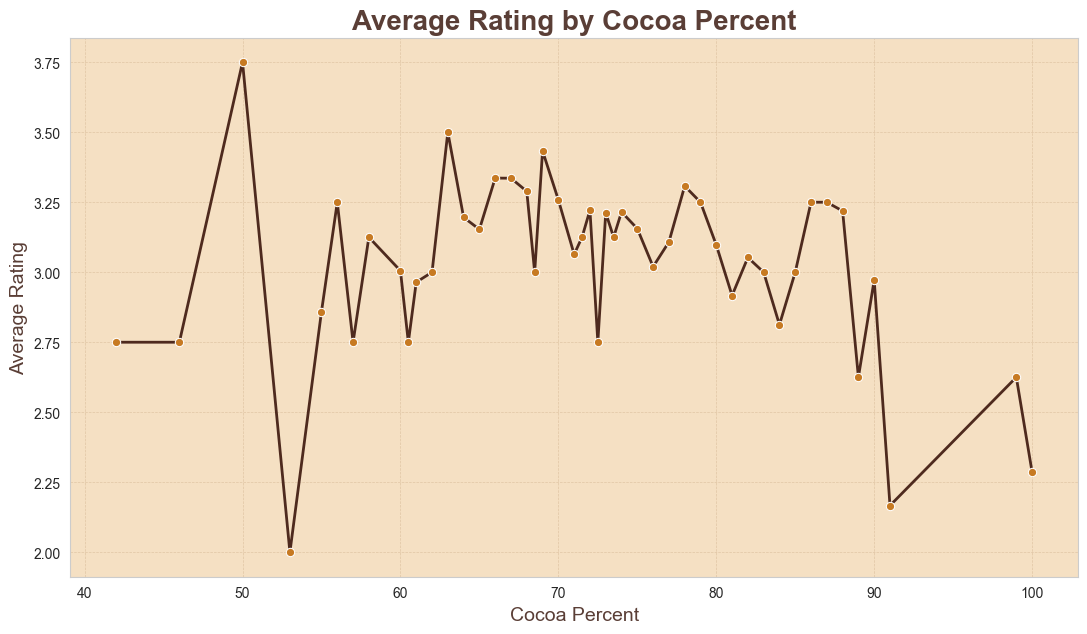

In [22]:
# Grouping data by cocoa percentage and plotting the average rating per cocoa %.
cocoa_avg = df.groupby("Cocoa Percent")["Rating"].mean().reset_index()

plt.figure(figsize=(13,7))
sns.lineplot(x=cocoa_avg["Cocoa Percent"], y=cocoa_avg["Rating"], marker="o",
            color="#4E2A1E", markersize=6, markerfacecolor="#C77A22", linewidth=2)
plt.title("Average Rating by Cocoa Percent", fontsize=20, fontweight="bold", color="#5A3E36")
plt.xlabel("Cocoa Percent", fontsize=14, color="#5A3E36")
plt.ylabel("Average Rating", fontsize=14, color="#5A3E36")
plt.grid(color="#8B5A2B", linestyle="--", linewidth=0.5, alpha=0.2)
plt.gca().set_facecolor("#F5E0C3")   
plt.show()

#### Insights and Notes: 
* The changes in rating between 42% and 53% seem very extreme. We will look into the number of chocolates that fall into those percentages to determine if the discrepancy is due to a small sample size (if the number of chocolates is small), or if it's more meaningful (if the number is high).
* There are also noticeable changes between 90% and 100%, although not as extreme.
* Some questions that come to mind are: Is there an optimal amount of cocoa that corelates to higher ratings? How does the inclusion of other ingredients relate to cocoa percent and ratings?

Cocoa Percent
42.0        1
46.0        1
50.0        1
53.0        1
55.0       16
56.0        2
57.0        1
58.0        8
60.0       48
60.5        1
61.0        7
62.0       17
63.0       15
64.0       37
65.0       98
66.0       29
67.0       35
68.0       77
68.5        1
69.0       15
70.0     1187
71.0       47
71.5        2
72.0      334
72.5        4
73.0       73
73.5        2
74.0       72
75.0      331
76.0       38
77.0       44
78.0       26
79.0        2
80.0       95
81.0        6
82.0       19
83.0        5
84.0        4
85.0       40
86.0        1
87.0        1
88.0        8
89.0        2
90.0        9
91.0        3
99.0        2
100.0      21
Name: count, dtype: int64


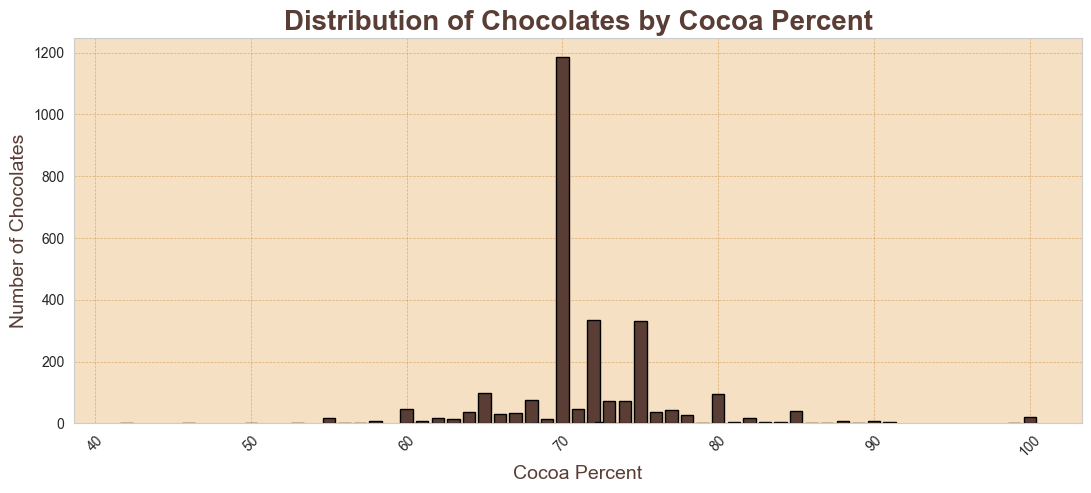

In [24]:
# Counting chocolates at each cocoa percent level
cocoa_counts = df["Cocoa Percent"].value_counts().sort_index()
print(cocoa_counts)

plt.figure(figsize=(13,5))
plt.bar(cocoa_counts.index, cocoa_counts.values, color="#5A3E36", edgecolor="black")
plt.title("Distribution of Chocolates by Cocoa Percent", fontsize=20, fontweight="bold", color="#5A3E36")
plt.xlabel('Cocoa Percent', fontsize=14, color="#5A3E36")
plt.ylabel('Number of Chocolates', fontsize=14, color="#5A3E36")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle="--", linewidth=0.5, color="#C77A22", alpha=0.5)
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#C77A22", alpha=0.5)
plt.gca().set_facecolor("#F5E0C3")
plt.show()

#### Insights and Notes: 
* There are only 4 counts between 42% and 53%, which makes the fluctuations less meaningful.
* Almost half of all chocolates contain 70% cocoa.

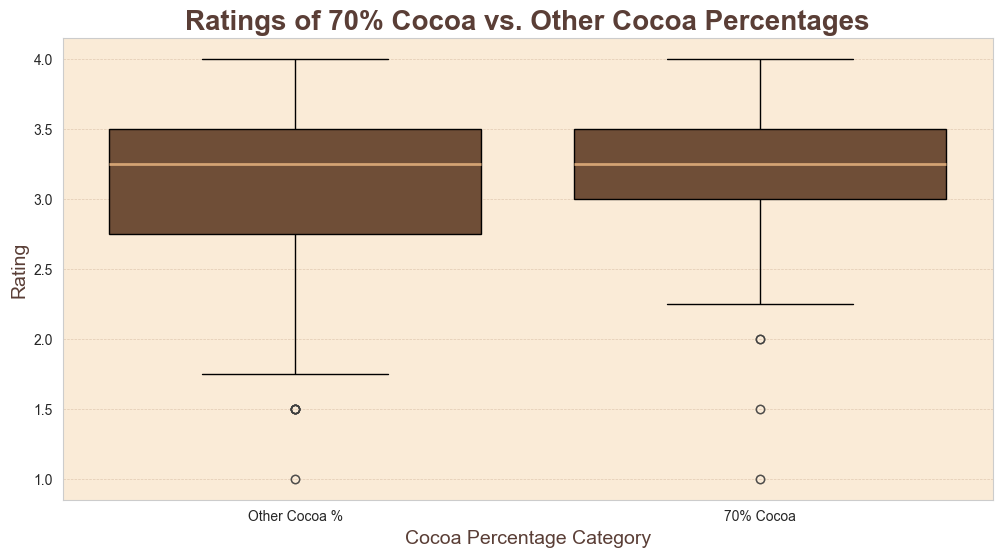

In [26]:
# Comparing the distribution of ratings of 70% chocolates vs. all other percentages
df["Is_70"] = df["Cocoa Percent"] == 70

plt.figure(figsize=(12,6))
sns.boxplot(x=df["Is_70"], y=df["Rating"], boxprops=dict(facecolor="#6F4E37", edgecolor="black"), 
            medianprops=dict(color="#D4A373", linewidth=2), whiskerprops=dict(color="black"),
            capprops=dict(color="black"), flierprops=dict(marker="o", color="#8B322C", alpha=0.7))
plt.xticks([0, 1], ["Other Cocoa %", "70% Cocoa"])
plt.title("Ratings of 70% Cocoa vs. Other Cocoa Percentages", fontsize=20, fontweight="bold", color="#5A3E36")
plt.xlabel("Cocoa Percentage Category", fontsize=14, color="#5A3E36")
plt.ylabel("Rating", fontsize=14, color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.3)
plt.gca().set_facecolor("#FAEBD7")
plt.show()

In [27]:
# Performing a t-test
t_stat, p_value = ttest_ind(df[df["Is_70"]]["Rating"], df[~df["Is_70"]]["Rating"], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")


T-statistic: 6.4843964911599326, P-value: 1.0574998276837988e-10


In [28]:
# Checking mean ratings
mean_70 = df[df["Is_70"]]["Rating"].mean()
mean_other = df[~df["Is_70"]]["Rating"].mean()

print(f"Mean Rating for 70% Cocoa: {mean_70}")
print(f"Mean Rating for Other Cocoa Percentages: {mean_other}")


Mean Rating for 70% Cocoa: 3.25821398483572
Mean Rating for Other Cocoa Percentages: 3.151685393258427


#### Insights and Notes: 
* While the box plot suggest that 70% cocoa chocolates have a similar spread of ratings, the t-test confirms that their ratings are statistically different from other cocoa percentages, meaning this isn't just random variation.
* While the preference is small (3.26 vs. 3.15), it is consistent across the dataset, suggesting that 70% cocoa is generally well-received.
* We will look into other factors such as ingredients and brand quality to see if they also contribute to ratings.

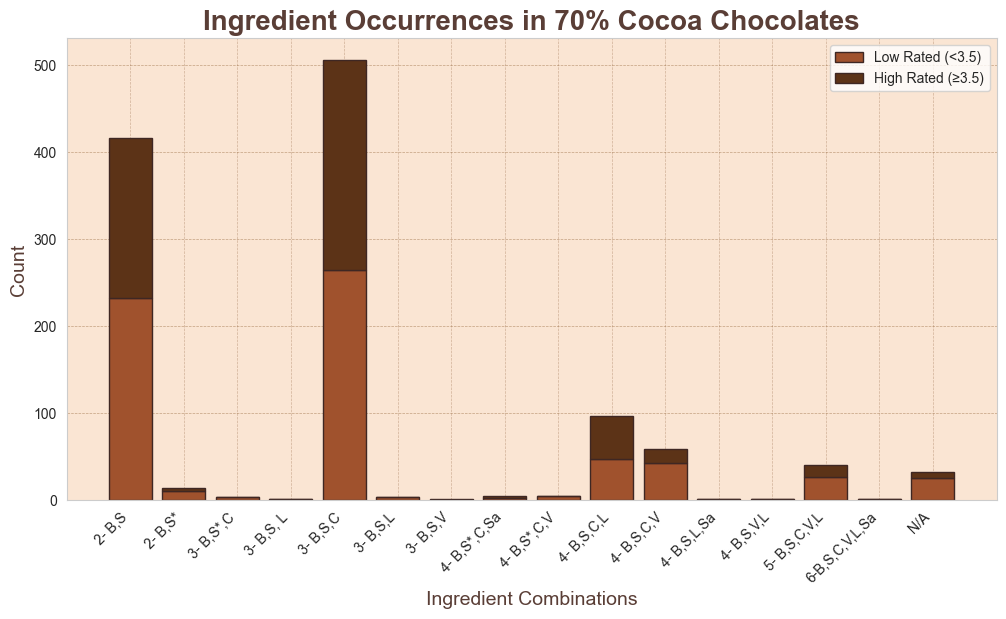

In [30]:
# Filtering data for 70% cocoa chocolates with ratings higher and lower than 3.5
high_rated_70 = df[(df["Cocoa Percent"] == 70) & (df["Rating"] >= 3.5)]
low_rated_70 = df[(df["Cocoa Percent"] == 70) & (df["Rating"] < 3.5)]

# Counting ingredient occurrences
high_rated_70_ingredients = high_rated_70["Ingredients"].value_counts()
low_rated_70_ingredients = low_rated_70["Ingredients"].value_counts()

# Creating a full list of all ingredients in either group
all_ingredients = sorted(set(high_rated_70_ingredients.index) | set(low_rated_70_ingredients.index))

# Getting counts for each ingredient, defaulting to 0 if not present
high_counts = [high_rated_70_ingredients.get(ing, 0) for ing in all_ingredients]
low_counts = [low_rated_70_ingredients.get(ing, 0) for ing in all_ingredients]

plt.figure(figsize=(12, 6))
plt.bar(all_ingredients, low_counts, label="Low Rated (<3.5)", color="#A0522D", edgecolor="#3E2723")
plt.bar(all_ingredients, high_counts, bottom=low_counts, label="High Rated (≥3.5)", color="#5C3317", edgecolor="#3E2723")
plt.xlabel("Ingredient Combinations", fontsize=14, color="#5A3E36")
plt.ylabel("Count", fontsize=14, color="#5A3E36")
plt.title("Ingredient Occurrences in 70% Cocoa Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#8B5A2B", alpha=0.5)
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.gca().set_facecolor("#FAE5D3")
plt.xticks(rotation=45, ha="right") 
plt.legend()
plt.show()

#### Insights and Notes: 
* The most common ingredient combinations are B,S,C (beans, sugar, and cocoa butter) and B,S (beans and sugar). And they both appear at similar rates in both high and low-rated chocolates.
* There are no clear patterns were adding additional ingredients such as V (vanilla) or L (lecithin), consistently leads to better ratings.

In [32]:
# Grouping data by brand and getting the average rating for 70% chocolates
top_70_brands = df[df["Cocoa Percent"] == 70].groupby("Company(Manufacturer)")["Rating"].mean().reset_index()

top_70_brands_sorted = top_70_brands.sort_values(by="Rating", ascending=False)
print(top_70_brands_sorted.head(10)) 

       Company(Manufacturer)    Rating
211  L.A. Burdick (Felchlin)  4.000000
378   Tobago Estate (Pralus)  4.000000
194        Idilio (Felchlin)  4.000000
46                 Brasstown  3.875000
63             Cacao Sampaka  3.833333
166            Georgia Ramon  3.750000
168                  Goodnow  3.750000
230      Madecasse (Cinagra)  3.750000
208                 Kerchner  3.750000
124          Dole (Guittard)  3.750000


In [33]:
# Overall average rating for all brands
all_brands_rating = df.groupby("Company(Manufacturer)")["Rating"].mean().reset_index()

all_brands_rating_sorted = all_brands_rating.sort_values(by="Rating", ascending=False)
print(all_brands_rating_sorted.head(10))

                    Company(Manufacturer)    Rating
597                Tobago Estate (Pralus)  4.000000
455                                Ocelot  3.875000
287  Heirloom Cacao Preservation (Zokoko)  3.875000
392                                Matale  3.812500
480                                Patric  3.791667
170                        Cuna de Piedra  3.750000
443                                 Nikoa  3.750000
608                   Un Dimanche A Paris  3.750000
454                                 Obolo  3.750000
258                               Goodnow  3.750000


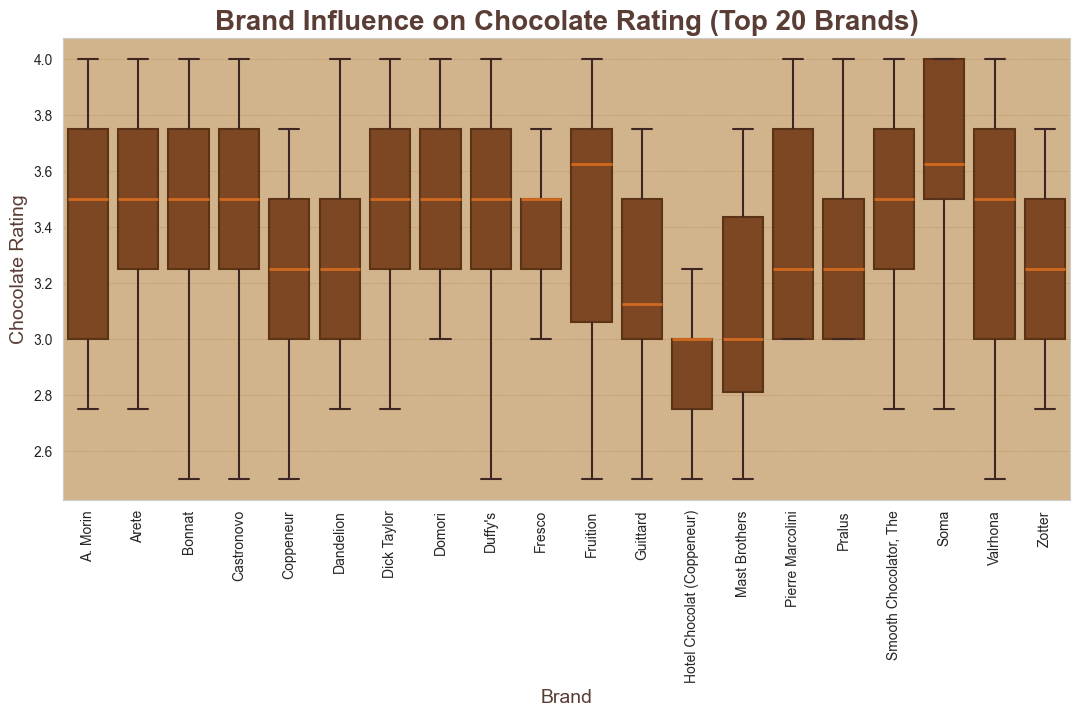

In [34]:
# Creating a box plot of the top 20 brands with the most chocolates reviewed
top_20_brands = df['Company(Manufacturer)'].value_counts().index[:20]
df_filtered = df[df['Company(Manufacturer)'].isin(top_20_brands)]

plt.figure(figsize=(13,6))
sns.boxplot(x=df_filtered['Company(Manufacturer)'], y=df_filtered['Rating'], color="#8B4513", 
    showfliers=False, boxprops=dict(edgecolor="#5C3317", linewidth=1.5), whiskerprops=dict(color="#3E2723", linewidth=1.5),
    capprops=dict(color="#3E2723", linewidth=1.5), medianprops=dict(color="#D2691E", linewidth=2))
plt.xticks(rotation=90)
plt.xlabel('Brand', fontsize=14, color="#5A3E36")
plt.ylabel('Chocolate Rating', fontsize=14, color="#5A3E36")
plt.title('Brand Influence on Chocolate Rating (Top 20 Brands)', fontsize=20, fontweight="bold", color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#8B5A2B", alpha=0.3)
plt.gca().set_facecolor("#D2B48C")
plt.show()

In [35]:
# Preparing the data and setting up a regression model
df['Brand_Cat'] = df["Company(Manufacturer)"].astype("category").cat.codes
X = sm.add_constant(df['Brand_Cat'])
y = df['Rating']
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Rating   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                   0.08136
Date:                Thu, 20 Mar 2025   Prob (F-statistic):              0.775
Time:                        20:57:11   Log-Likelihood:                -1654.8
No. Observations:                2789   AIC:                             3314.
Df Residuals:                    2787   BIC:                             3325.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2010      0.016    197.437      0.0

#### Insights and Notes: 
* According to the regression summary, brand name does not have a strong effect on rating. Any differences in ratings are likely due to chance rather than the brand itself. 
* We will now focus on analyzing chocolates rated 3.5 and above regardless of cocoa percentage, which will capture the chocolates people liked the most and remove low-rated chocolates that might skew insights.

In [37]:
# Filtering chocolates with ratings 3.5 and above
high_rated_chocolates = df[df["Rating"] >= 3.5]

# Filtering chocolates with ratings below 3.5 for comparison
low_rated_chocolates = df[df["Rating"] < 3.5]

In [38]:
# Counting ingredient occurrences in high-rated chocolates
high_rated_ingredients = high_rated_chocolates["Ingredients"].value_counts()
print(high_rated_ingredients.head(5))

Ingredients
3- B,S,C        499
2- B,S          315
4- B,S,C,L      122
5- B,S,C,V,L     61
4- B,S,C,V       31
Name: count, dtype: int64


In [39]:
# Counting ingredient occurrences in low-rated chocolates
low_rated_ingredients = low_rated_chocolates["Ingredients"].value_counts()
print(low_rated_ingredients.head(5))

Ingredients
3- B,S,C        666
2- B,S          481
4- B,S,C,L      175
5- B,S,C,V,L    123
4- B,S,C,V      110
Name: count, dtype: int64


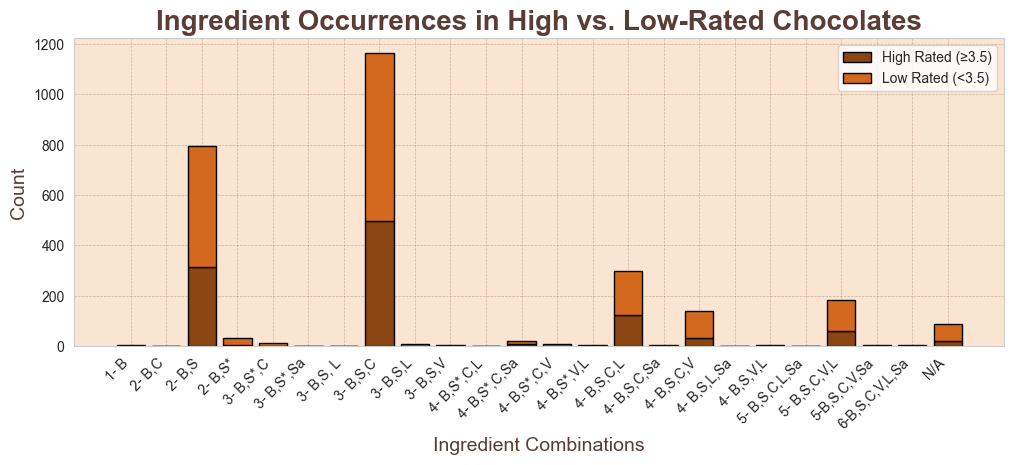

In [40]:
# Creating a stacked bar chart to compare ingredient combinations on high rated vs. low rated chocolates
high_rated_ingredients = high_rated_chocolates["Ingredients"].value_counts()
low_rated_ingredients = low_rated_chocolates["Ingredients"].value_counts()

# Creating a full list of all ingredients in either group
all_ingredients = sorted(set(high_rated_ingredients.index) | set(low_rated_ingredients.index))

# Getting counts for each ingredient, defaulting to 0 if not present
high_counts = [high_rated_ingredients.get(ing, 0) for ing in all_ingredients]
low_counts = [low_rated_ingredients.get(ing, 0) for ing in all_ingredients]

plt.figure(figsize=(12, 4))
plt.bar(all_ingredients, high_counts, label="High Rated (≥3.5)", color="#8B4513", edgecolor="black")
plt.bar(all_ingredients, low_counts, bottom=high_counts, label="Low Rated (<3.5)", color="#D2691E", edgecolor="black")
plt.xlabel("Ingredient Combinations", fontsize=14, color="#5A3E36")
plt.ylabel("Count", fontsize=14, color="#5A3E36")
plt.title("Ingredient Occurrences in High vs. Low-Rated Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.gca().set_facecolor("#FAE5D3")
plt.xticks(rotation=45, ha="right") 
plt.legend()
plt.show()

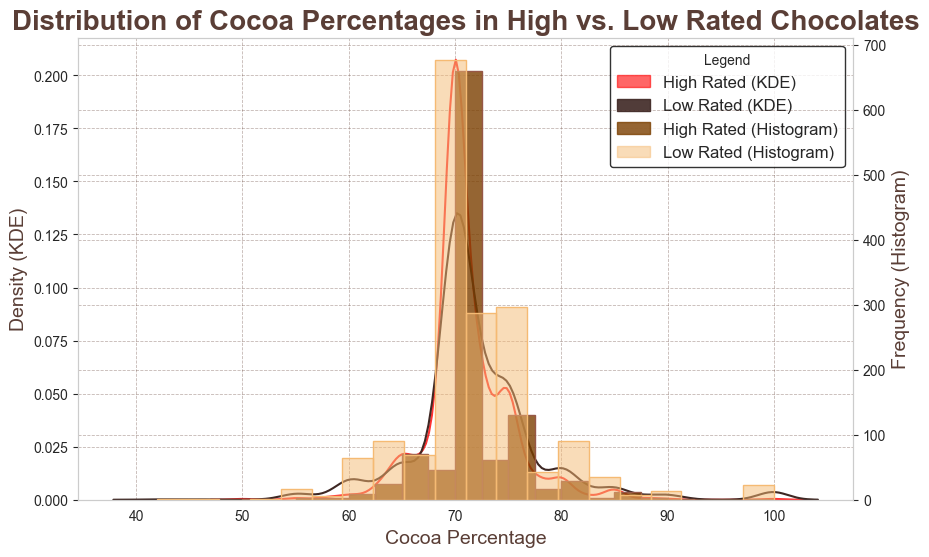

In [41]:
# Using a KDE plot and a histogram to see the shape of the distributions and the actual counts
fig, ax1 = plt.subplots(figsize=(10, 6))
ax2 = ax1.twinx()

sns.kdeplot(high_rated_chocolates["Cocoa Percent"], label="High Rated (≥3.5)", color="red", alpha=0.8, ax=ax1)
sns.kdeplot(low_rated_chocolates["Cocoa Percent"], label="Low Rated (<3.5)", color="#3E2723", ax=ax1)

sns.histplot(high_rated_chocolates["Cocoa Percent"], bins=20, color="#7B3F00", alpha=0.8, edgecolor="#965747", ax=ax2)
sns.histplot(low_rated_chocolates["Cocoa Percent"], bins=20, color="#F5BA73", alpha=0.5, edgecolor="#F5BA73", ax=ax2)

ax1.set_xlabel("Cocoa Percentage", fontsize=14, color="#5A3E36")
ax1.set_ylabel("Density (KDE)", fontsize=14, color="#5A3E36")
ax2.set_ylabel("Frequency (Histogram)", fontsize=14, color="#5A3E36")
ax1.set_title("Distribution of Cocoa Percentages in High vs. Low Rated Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")

ax1.grid(color="#6D4C41", linestyle="--", linewidth=0.6, alpha=0.4)  
ax2.grid(color="#6D4C41", linestyle="--", linewidth=0.6, alpha=0.4)  
kde_high_patch = mpatches.Patch(color="red", label="High Rated (KDE)", alpha=0.6)
kde_low_patch = mpatches.Patch(color="#3E2723", label="Low Rated (KDE)", alpha=0.9)
hist_high_patch = mpatches.Patch(color="#7B3F00", label="High Rated (Histogram)", alpha=0.8)
hist_low_patch = mpatches.Patch(color="#F5BA73", label="Low Rated (Histogram)", alpha=0.5)
ax1.legend(handles=[kde_high_patch, kde_low_patch, hist_high_patch, hist_low_patch], 
           title="Legend", frameon=True, facecolor="white", edgecolor="black", fontsize=12)
plt.show()

#### Insights and Notes: 
* Chocolates containing around 70% cocoa are the most common and tend to have higher ratings.
* There’s a trend suggesting that chocolates in the 65-75% range are more likely to be highly rated.
* Cocoa percentages outside of this range have more variation and tend to receive lower ratings.

      Category  High Rated Count  Low Rated Count
11       Fruit               566              455
19     Texture               433              760
12   Intensity               432              548
6        Cocoa               355              277
15      Roasty               232              469
17       Spice               222              340
18       Sweet               211              514
13        Nuts               206              233
9       Earthy               136              428
7   Complexity               126              170
16        Sour                94              265
0    Aftermelt                83              230
10      Floral                78               98
2   Appearance                63               64
8        Dairy                58               88
14       Other                55              147
1      Alcohol                29               19
20       Umami                14               74
21     Vegetal                14               33


<Figure size 1000x600 with 0 Axes>

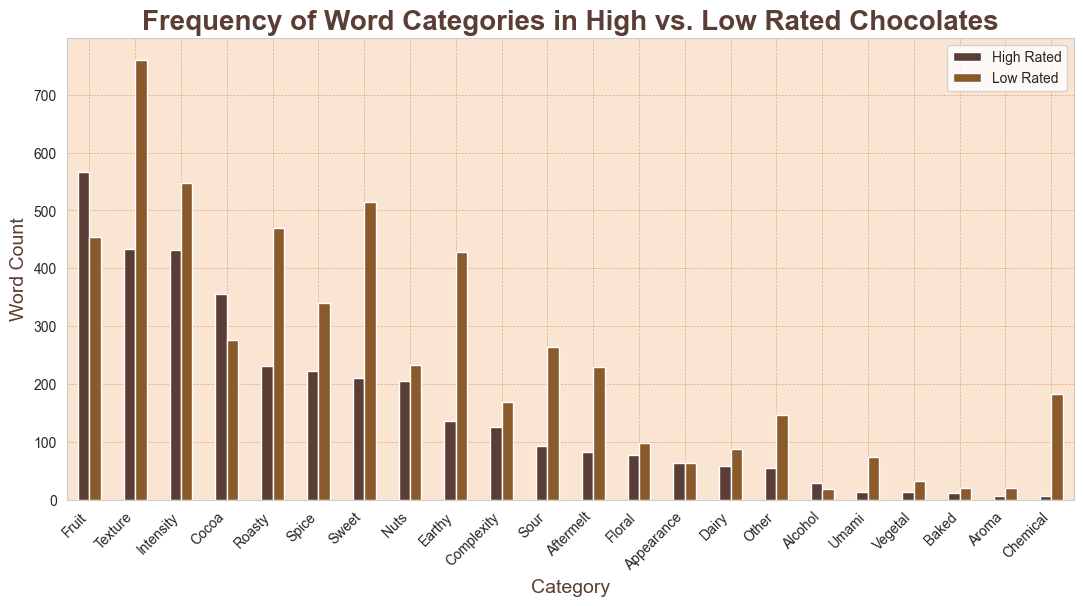

In [43]:
# Analyzing the frequency of words and categories mentioned in ratings
df_words = pd.read_csv("./Datasets/chocolate_word_counts.csv")
category_counts = df_words.groupby("Category")[["High Rated Count", "Low Rated Count"]].sum().reset_index()
category_counts_sorted = category_counts.sort_values(by="High Rated Count", ascending=False)
print(category_counts_sorted)
colors = ["#5A3E36", "#8B5A2B"]
plt.figure(figsize=(10,6))
ax = category_counts_sorted.plot(x="Category", kind="bar", stacked=False, figsize=(13,6), color=colors)

plt.xlabel("Category", fontsize=14, color="#5A3E36")
plt.ylabel("Word Count", fontsize=14, color="#5A3E36")
plt.title("Frequency of Word Categories in High vs. Low Rated Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")
plt.xticks(rotation=45, ha="right") 
plt.legend(["High Rated", "Low Rated"])
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#D2691E", alpha=0.5) 
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.gca().set_facecolor("#FAE5D3")
plt.show()

#### Insights and Notes: 
* The category Fruit seems to appeal to a lot of reviewers, however, it could be that some specific fruits are generally well-liked, and others are not as opposed to people favoring fruity notes in general.
* There's a surprising number of mentions of Chemical taste.
* Nuts, Appearance, Alcohol, and Baked are mentioned with similar frequency in high and low ratings.

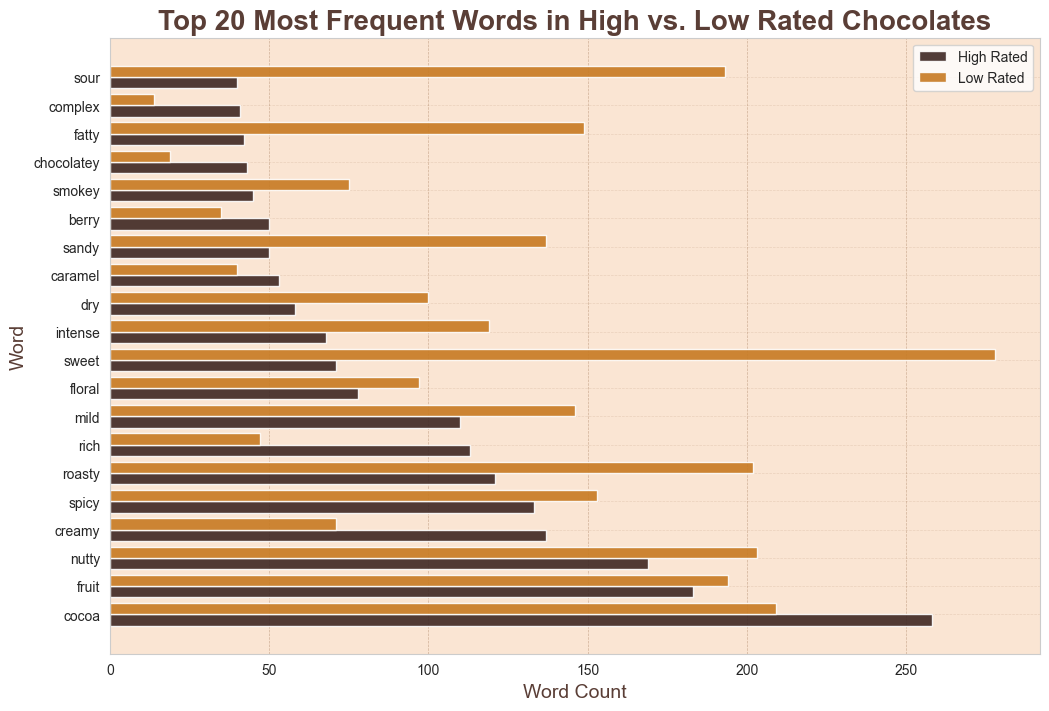

In [45]:
# Selecting the 10 most frequent words in low and high-rated chocolates
top_words = df_words.nlargest(20, ["High Rated Count", "Low Rated Count"])
x = np.arange(len(top_words))

plt.figure(figsize=(12, 8))
bar_width = 0.4 
plt.barh(x - bar_width/2, top_words["High Rated Count"], height=bar_width, color="#3E2723", alpha=0.9, label="High Rated")
plt.barh(x + bar_width/2, top_words["Low Rated Count"], height=bar_width, color="#C77A22", alpha=0.9, label="Low Rated")
plt.yticks(x, top_words["Word"])
plt.xlabel("Word Count", fontsize=14, color="#5A3E36")
plt.ylabel("Word", fontsize=14, color="#5A3E36")
plt.title("Top 20 Most Frequent Words in High vs. Low Rated Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.2) 
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.gca().set_facecolor("#FAE5D3")
plt.legend()
plt.show()


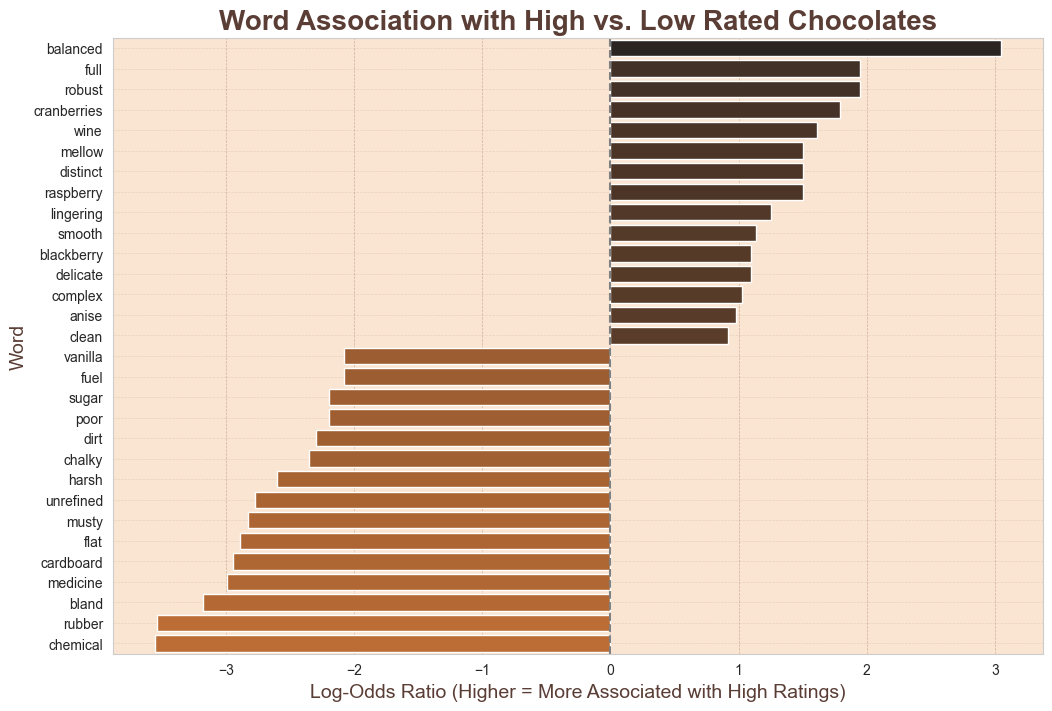

In [46]:
# Computing Log-Odds Ratio to find the most strongly associated words of high-rated vs. low-rated chocolates.
df_words["log_odds"] = np.log((df_words["High Rated Count"] + 1) / (df_words["Low Rated Count"] + 1))
custom_palette = sns.dark_palette("#D2691E", reverse=True, as_cmap=True)

min_occurrences = 5
filtered_words = df_words[df_words[["High Rated Count", "Low Rated Count"]].sum(axis=1) >= min_occurrences].copy()
filtered_words = filtered_words.sort_values("log_odds", ascending=False)
top_words = pd.concat([filtered_words.head(15), filtered_words.tail(15)])

plt.figure(figsize=(12, 8))
sns.barplot(y=top_words["Word"], x=top_words["log_odds"], hue=top_words["log_odds"], palette=custom_palette, dodge=False, legend=False)
plt.axvline(x=0, color="gray", linestyle="--", label="Neutral (0)")
plt.xlabel("Log-Odds Ratio (Higher = More Associated with High Ratings)", fontsize=14, color="#5A3E36")
plt.ylabel("Word", fontsize=14, color="#5A3E36")
plt.title("Word Association with High vs. Low Rated Chocolates", fontsize=20, fontweight="bold", color="#5A3E36")
plt.grid(axis="y", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.2) 
plt.grid(axis="x", linestyle="--", linewidth=0.5, color="#A67B5B", alpha=0.5) 
plt.gca().set_facecolor("#FAE5D3")
plt.show()

In [47]:
# Finding words that appear with similar frequency in both high and low-rated chocolates.
neutral_threshold = 0.2  
neutral_words = filtered_words[(filtered_words["log_odds"].abs() < neutral_threshold)].copy()
neutral_words["total_count"] = neutral_words["High Rated Count"] + neutral_words["Low Rated Count"]
neutral_words = neutral_words.sort_values("total_count", ascending=False)
neutral_words.head(15)

,Word,High Rated Count,Low Rated Count,Category,log_odds,total_count
104,fruit,183,194,Fruit,-0.058064,377
175,nutty,169,203,Nuts,-0.182322,372
240,spicy,133,153,Spice,-0.139113,286
32,brownie,34,32,Cocoa,0.058841,66
207,red,29,24,Appearance,0.182322,53
130,honey,24,24,Sweet,0.000000,48
188,pepper,20,21,Spice,-0.046520,41
155,melon,20,19,Fruit,0.048790,39
203,raisins,21,18,Fruit,0.146603,39
26,bold,17,14,Intensity,0.182322,31


#### Insights and Notes: 
* Certain terms (e.g., "spicy" and "nutty") are common in both high and low-rated chocolates, suggesting that other factors, like balance and texture, contribute to the final perception.
* Chemical," "rubber," "medicine," "cardboard," "bland," and "musty" are some of the most negatively associated words. This suggests that chocolates with off-putting flavors, artificial elements, or a lack of complexity tend to be rated poorly.
* Terms like "balanced," "full," "robust," "cranberries," "wine," and "mellow" are strongly linked to highly rated chocolates.
* Descriptors related to richness, fruitiness, and smoothness (e.g., "lingering," "complex," "smooth") appear frequently in high-rated chocolates Suggesting that chocolates perceived as complex, well-rounded, and with fruity or wine-like notes tend to receive better reviews.

In [49]:
country_ratings = df.groupby("Country of Bean Origin")["Rating"].mean().reset_index()
df_map = df.groupby("Country of Bean Origin").agg(chocolates_count=("Rating", "count"), avg_rating=("Rating", "mean")).reset_index()
df_map.rename(columns={"Country of Bean Origin": "location"}, inplace=True)

In [ ]:
# Creating a map to visualize bean origins around the world and their average ratings
choropleth = go.Choropleth(
    locations=df_map["location"],
    locationmode="country names",
    z=df_map["avg_rating"],
    colorscale=[[0, "#C19A6B"], [0.25, "#9C6B4F"], [0.5, "#87491E"], [0.75, "#4A3030"], [1, "#2B2424"]],
    colorbar_title="Avg Rating",
    hoverinfo="location+z",
)

bubbles = go.Scattergeo(
    locations=df_map["location"],
    locationmode="country names",
    text=df_map["location"] + "<br>Chocolates: " + df_map["chocolates_count"].astype(str),
    marker=dict(color="red", opacity=0.6),
    hoverinfo="text",
)

fig = go.Figure(data=[choropleth, bubbles])
fig.update_layout(
     geo=dict(
        showcoastlines=False,
        projection_type="natural earth",
        showframe=False,
        showland=True,
        landcolor="#B0A79E",
        lakecolor="#D7CCC8", 
        bgcolor="#F5E5D5"  
    ),
    width=1050,  
    height=700,  
    margin=dict(l=20, r=20, t=0, b=0)
)

fig.show(config={"displayModeBar": True, "responsive": True})


<img src="https://github.com/AvaWhitney/chocolate-ratings-analysis/blob/main/media/bean_origins_and_avg_ratings.png?raw=true">

In [52]:
# Finding the top countries with the highest average rating
top_countries = df_map.groupby("location").agg(chocolates_count=("chocolates_count", "sum"), 
    avg_rating=("avg_rating", "mean")).reset_index()

top_countries = top_countries.sort_values(by="avg_rating", ascending=False).head(10)
display(top_countries) 

,location,chocolates_count,avg_rating
46,Solomon Islands,10,3.450000
11,Congo,11,3.318182
52,Thailand,10,3.300000
38,Papua New Guinea,50,3.280000
31,Madagascar,194,3.265464
23,Guatemala,68,3.264706
57,United States of America,35,3.264286
56,United Republic of Tanzania,94,3.263298
35,Nicaragua,109,3.256881
6,Brazil,83,3.256024


# Key Findings
---

#### 1 Distribution of Chocolate Ratings
* The ratings are skewed toward higher values, with most chocolates rated between 3.0 and 3.5.
* Very few chocolates receive extremely low (<2.5) or high (>3.8) ratings, suggesting that most chocolates are moderately well-received but rarely exceptional.
  
#### 2 Influence of Cocoa Percentage on Chocolate Ratings
* The highest-rated chocolates tend to have cocoa percentages between 65-75%.
* 70% cocoa dominates the dataset and has slightly higher ratings overall.
* Higher cocoa content (>85%) is associated with lower ratings, potentially due to increased bitterness.

#### 3 Ingredient Combinations 
* The most common ingredient combinations in highly rated chocolates are:
    * Beans (B) and Sugar (S)
    * Beans, Sugar, and Cocoa Butter (B-S-C)
* Additional ingredients such as lecithin (L) and vanilla (V) are less common in highly rated chocolates.
* Low-rated chocolates sometimes have more complex ingredient lists, possibly indicating over-processing or artificial additives.

#### 4 Brand Influence on Ratings
* Brand name does not have a statistically significant effect on chocolate ratings.
* Any differences in ratings are likely due to chance rather than brand reputation. However, that does not mean that brand name doesn't influence purchasing decisions.

#### 5 Word Associations with High vs. Low Rated Chocolates
* Highly rated chocolates are frequently described as:
    * Balanced, robust, smooth, mellow, lingering, raspberry, complex, delicate.
* Low-rated chocolates are commonly described as:
    * Chalky, bland, musty, rubbery, chemical, harsh, burnt, cardboard.
* The words “fruit,” “nutty,” and “spicy” appear frequently in both categories, suggesting they are neutral descriptors rather than strong indicators of quality.
* Words associated with refinement, depth, and smoothness correlate with higher ratings, while texture descriptors such as "fatty" or "sandy" strongly indicate lower ratings.
  
#### 6 Country of Bean Origin & Chocolate Ratings
* The highest average-rated cocoa beans come from:
    * Solomon Islands, Congo, and Thailand.
* Peru, Venezuela, Dominican Republic, and Ecuador produce the most cocoa but, on average, do not have the highest ratings.
* Madagascar is the 4th largest producer in the dataset and also ranks 5th in average ratings, indicating a strong balance of quantity and quality.


## Final Takeaways
####  Texture & Flavor Balance Matter
Chocolates described as smooth, balanced, and complex tend to receive higher ratings.
####  Cocoa Percentage Alone Doesn't Define Quality
Mid-range cocoa percentages (65-75%) perform well, but higher cocoa content doesn’t always mean better quality.
####  Ingredients Influence Ratings
Simplicity is key—too many ingredients can lead to lower ratings.
####  Descriptive Words Are Powerful Predictors 
Words like "chalky" or "burnt" are almost always linked to low ratings, while "smooth" and "mellow" are strongly linked to high ratings.
####  Geography Affects Bean Quality 
Some countries consistently produce higher-rated beans, reinforcing the impact of bean origin on chocolate quality.